# Malaria Detection 

dataset : https://www.kaggle.com/thenandkishorkumawat/cellimagesfordetectingmalaria

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.

In 2017, there were an estimated 219 million cases of malaria in 90 countries.
Malaria deaths reached 435 000 in 2017.
The WHO African Region carries a disproportionately high share of the global malaria burden. In 2017, the region was home to 92% of malaria cases and 93% of malaria deaths.
Malaria is caused by Plasmodium parasites. The parasites are spread to people through the bites of infected female Anopheles mosquitoes, called "malaria vectors." There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat.



Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable. Malaria causes symptoms that typically include fever, tiredness, vomiting, and headaches. In severe cases it can cause yellow skin, seizures, coma, or death.



Here Images are of blood cells of 2 categories : *Parasitized* and *uninfected*

<center>Parasitized</center>
<img src="par.PNG">


<center>uninfected</center>
<img src="uninfected.PNG">


In [1]:
from pyforest import *
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras import optimizers
from tensorflow.keras import optimizers

#### Loading dataset into train and test

In [17]:
IMAGE_SIZE = [200, 200]

In [18]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [19]:
# loading train data
train_data = datagen.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/cell_images/train',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'binary',
                                                   batch_size = 128,
                                                   subset = 'training'
                                                   )

Found 17638 images belonging to 2 classes.


In [20]:
validation_data  = datagen.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/cell_images/train',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'binary',
                                                   batch_size = 128,
                                                   subset = 'validation'
                                                   )


Found 4408 images belonging to 2 classes.


In [21]:
# loading test data
datagen2 = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
test_data = datagen2.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/cell_images/valid',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'binary',
                                                   batch_size = 128,
                                                   )

Found 5512 images belonging to 2 classes.


## Basic CNN

In [38]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (200, 200, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [39]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 128)       36992     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)       

In [40]:
from time import time
from tensorflow.keras.callbacks import TensorBoard

tensorboard1=TensorBoard(log_dir='.\CNN'.format(time()), write_graph=True, write_images=True)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [42]:
history = model.fit_generator(generator=train_data,
                              steps_per_epoch = len(train_data),
                              epochs = 15,
                              validation_data = validation_data,
                              validation_steps = len(validation_data),
                              callbacks=[tensorboard1])

Epoch 1/15
138/138 [==============================] - 34s 245ms/step - loss: 0.6926 - acc: 0.5448 - val_loss: 0.6835 - val_acc: 0.5544
Epoch 2/15
138/138 [==============================] - 34s 243ms/step - loss: 0.6569 - acc: 0.6076 - val_loss: 0.6659 - val_acc: 0.5935
Epoch 3/15
138/138 [==============================] - 34s 244ms/step - loss: 0.6421 - acc: 0.6358 - val_loss: 0.6579 - val_acc: 0.6100
Epoch 4/15
138/138 [==============================] - 33s 238ms/step - loss: 0.6060 - acc: 0.6737 - val_loss: 0.5623 - val_acc: 0.7130
Epoch 5/15
138/138 [==============================] - 33s 241ms/step - loss: 0.3929 - acc: 0.8345 - val_loss: 0.2599 - val_acc: 0.9170
Epoch 6/15
138/138 [==============================] - 33s 240ms/step - loss: 0.2239 - acc: 0.9258 - val_loss: 0.2305 - val_acc: 0.9367
Epoch 7/15
138/138 [==============================] - 33s 240ms/step - loss: 0.1890 - acc: 0.9402 - val_loss: 0.2059 - val_acc: 0.9313
Epoch 8/15
138/138 [==============================] - 3

In [43]:
results = model.evaluate(test_data, batch_size=128)

44/44 [==============================] - 8s 173ms/step - loss: 0.1731 - acc: 0.9488


In [44]:
print('test loss, test acc:', results)

test loss, test acc: [0.17313027119433338, 0.9488389]


accuracy and loss graph
<img src="epoch_CNN.PNG">
<img src="epoch_val_CNN.PNG">

<b>tensorboard Graph</b>

<img src="Baic_CNN.PNG">


## Transfer Learning Models

### 1. VGG16

In [45]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

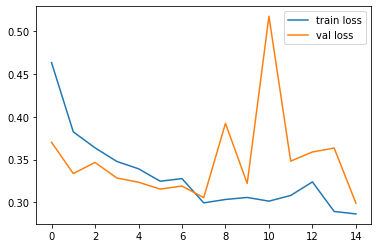

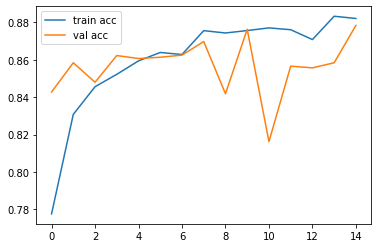

<Figure size 432x288 with 0 Axes>

In [48]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [200, 200]

train_path = 'cell_images/train'
valid_path = 'cell_images/valid'

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                subset='validation')

test_set = test_datagen.flow_from_directory('cell_images/valid',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

from time import time
from tensorflow.keras.callbacks import TensorBoard

tensorboard2=TensorBoard(log_dir='.\VGG19'.format(time()), write_graph=True, write_images=True)

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
    callbacks=[tensorboard2])

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [49]:
results = model.evaluate_generator(test_set,steps=len(test_set))

In [50]:
print('test loss, test acc:', results)

test loss, test acc: [0.26250403144103523, 0.9000362844702468]


accuracy and loss graph
<img src="epoch_VGG19.PNG">
<img src="epoch_val_VGG19PNG.PNG">

<b>tensorboard</b>
<img src="VGG19.png">

### 2. ResNet50

In [51]:
import os
from keras import Sequential,Model
from keras.layers import Dense,Flatten,MaxPooling2D,Convolution2D,Activation,BatchNormalization,Softmax,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras import optimizers
import numpy as np
import sklearn
import random
from pathlib import Path

from keras import callbacks
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input


In [52]:
from keras.preprocessing.image import ImageDataGenerator

# loading training data
train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True,
      validation_split=0.2
    )

# loading test data
datagen2 = ImageDataGenerator(rescale=1/255.0)


train_generator = train_datagen.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/full_cell_images/', 
                                                    target_size=(180,180),
                                                    subset = 'training',
                                                    batch_size=16)


validation_data  = train_datagen.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/full_cell_images/',
                                                   target_size=(180,180), 
                                                   subset = 'validation',
                                                   batch_size=16)

# test_data = datagen2.flow_from_directory(directory='C:/Users/Aditya/Desktop/Aditya_SSD/AAIC/Malaria_detection/binary_problem/cell_images/valid',
#                                                    target_size = (180,180),
#                                                    batch_size = 16)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [53]:
Rsnt_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


C:\Users\Aditya\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [54]:
av1 = GlobalAveragePooling2D()(Rsnt_model.output)
fc1 = Dense(512, activation='relu')(av1)
drp1=Dropout(0.25)(fc1)
fc2 = Dense(256, activation='relu')(drp1)
drp2=Dropout(0.25)(fc2)
bat_norm=BatchNormalization()(drp2)
fc3 = Dense(64, activation='relu')(bat_norm)
out = Dense(2, activation='softmax')(fc3)

tl_model = Model(inputs=Rsnt_model.input,outputs=out)
tl_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 90, 90, 64)   256         conv1[0][0]                 

In [55]:
ada = optimizers.adam(lr=1e-5, decay=5e-4)
tl_model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])

In [56]:
from time import time
from tensorflow.keras.callbacks import TensorBoard

tensorboard3=TensorBoard(log_dir='.\ResNet50'.format(time()), write_graph=True, write_images=True)

In [59]:
history = tl_model.fit_generator(generator=train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 4,
                                callbacks=[tensorboard3])

Epoch 1/4
1378/1378 [==============================] - 242s 176ms/step - loss: 0.1772 - acc: 0.9380
Epoch 2/4
1378/1378 [==============================] - 242s 175ms/step - loss: 0.1359 - acc: 0.9526
Epoch 3/4
1378/1378 [==============================] - 240s 174ms/step - loss: 0.1312 - acc: 0.9556
Epoch 4/4
1378/1378 [==============================] - 236s 172ms/step - loss: 0.1292 - acc: 0.9574


In [60]:
results = tl_model.evaluate_generator(validation_data,steps=len(validation_data))

In [61]:
print('test loss, test acc:', results)

test loss, test acc: [0.12688469847498593, 0.9540834845735027]


accuracy and loss graph
<img src="epoch_Res.PNG">

<b>tensorboard graph</b>
<img src="Rsnet.png">

### 3. InceptionRes Net 

In [62]:
from keras.applications import InceptionResNetV2
irn = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(180,180,3), classes=2)


In [63]:
av1 = GlobalAveragePooling2D()(irn.output)
fc1 = Dense(512, activation='relu')(av1)
drp1=Dropout(0.25)(fc1)
fc2 = Dense(256, activation='relu')(drp1)
drp2=Dropout(0.25)(fc2)
bat_norm=BatchNormalization()(drp2)
fc3 = Dense(64, activation='relu')(bat_norm)
out = Dense(2, activation='softmax')(fc3)

tl_model = Model(inputs=irn.input,outputs=out)
tl_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 180, 180, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 89, 89, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 89, 89, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 89, 89, 32)   0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [74]:
ada = optimizers.adam(lr=1e-5, decay=5e-4)
tl_model.compile(loss='categorical_crossentropy', optimizer=ada, metrics=['accuracy'])

In [75]:
from time import time
from tensorflow.keras.callbacks import TensorBoard

tensorboard4=TensorBoard(log_dir='.\Incep'.format(time()), write_graph=True, write_images=True)

In [76]:
history = tl_model.fit_generator(generator=train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 2,
                                callbacks=[tensorboard4])

Epoch 1/2
1378/1378 [==============================] - 459s 333ms/step - loss: 0.1600 - acc: 0.9463
Epoch 2/2
1378/1378 [==============================] - 430s 312ms/step - loss: 0.1450 - acc: 0.9503


In [77]:
results = tl_model.evaluate_generator(validation_data,steps=len(validation_data))

In [78]:
print('test loss, test acc:', results)

test loss, test acc: [0.18810176771681775, 0.9413793103448276]


accuracy and loss graph
<img src="epoch_Incep.PNG">

### Steps :

- Importing Libraries.
- Loading the data.
- Data preprocessing & augmentation
- Spliting data in Train , validation and Test set using ImageDataGenerator
- Creating a Convolution Neural Network 
- Trying transfer learning using different architectures like VGG19, Resnet, InceptionNet
- Wrapping it with Tensorflow Estimator function.
- Training & testing the data
- Getting the accuracies


## Conclusion

In [3]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "train accuracy", "test accuracy",'epochs']

x.add_row(["Basic CNN", 96, 95,15])
x.add_row(["VGG19", 88.3, 90,15])
x.add_row(["ResNet50", 95.96, 95.28,4])
x.add_row(["InceptionResNet", 94.06, 94.42,2])

print(x)

+-----------------+----------------+---------------+--------+
|      Model      | train accuracy | test accuracy | epochs |
+-----------------+----------------+---------------+--------+
|    Basic CNN    |       96       |       95      |   15   |
|      VGG19      |      88.3      |       90      |   15   |
|     ResNet50    |     95.96      |     95.28     |   4    |
| InceptionResNet |     94.06      |     94.42     |   2    |
+-----------------+----------------+---------------+--------+


* Here we can see that Basic CNN has performed well but the epochs it took was 15 where as ResNet and InceptionRestNet took only 4 and 2 epochs respectively. So we can conclude that skipping unnecessary neurons is benifical with these archtitecures. 
* Also VGG19 did not perform well comparitively as it is too deep network that too without any skipping layer so too deep neural net is also not good.
* Basic CNN is not deep neural net plus with some dropouts its possible to reach accuracy of 95.
* Further also this accuracy can be improved with rigorous data augmentation but have to increase epochs but it requires good GPU processing 